# Movie Problem
## Data mining
### Not Reduced

In [ ]:
NAME = "Sara Grootjen"
STUDENT_NUMBER = "s1049280"
COLLABORATOR_NAME = "Lucia Rust"
COLLABORATOR_STUDENT_NUMBER = "s1053676"

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from yellowbrick.regressor import ResidualsPlot
import seaborn as sns
import statsmodels.api as sm
import pylab

The code below is adapted from the following source: 

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [49]:
movie_data_file = pd.read_csv(r'data/movie_data.csv')
movie_data = movie_data_file.drop("Unnamed: 0", axis=1)

y = movie_data[["rating"]]
movie_data_new = movie_data.drop("rating", axis=1)
X = movie_data_new

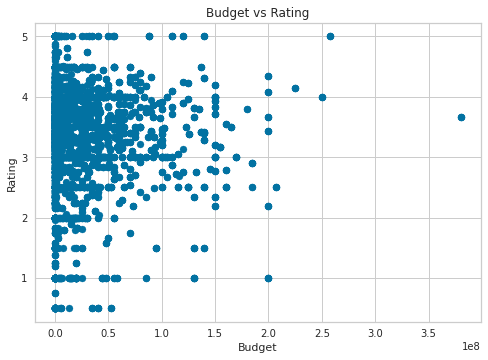

A scatterplot of the attribute 'budget' against 'rating', which is the y in the models


In [12]:
plt.scatter(X['budget'], y)
plt.title("Budget vs Rating")
plt.xlabel("Budget")
plt.ylabel("Rating")
plt.show()
print("A scatterplot of the attribute 'budget' against 'rating', which is the y in the models")

In [50]:
#The code below is adapted from the following source: 
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10)

regr = linear_model.LinearRegression() # This is the model that will be trained with movie_data_new

regr.fit(X_train, y_train)  #adapted from the source 

y_pred = regr.predict(X_test) #adapted from the source 

#The intercept
print("The intercept:", regr.intercept_[0]) #adapted from the source 
# The coefficients
print("Coefficients: \n", regr.coef_) #adapted from the source 
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred)) #adapted from the source 
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred)) #adapted from the source 

#baseline performance where the mean of y is the output for every test data point
y_pred_baseline = [y_test.mean(axis=0)] * len(y_test)
# The mean squared error
print("Mean squared error-baseline: %.2f" % mean_squared_error(y_test, y_pred_baseline))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination-baseline: %.2f" % r2_score(y_test, y_pred_baseline))


The intercept: 3.4499300685354832
Coefficients: 
 [[-4.49317772e-10 -3.43312901e-02  4.06252486e-02  8.10427414e-02
  -3.25395982e-02  2.72201860e-02 -4.73330553e-02 -4.20584871e-02
   3.02197377e-02 -1.65774369e-03  6.10520586e-02  6.83658003e-03
   8.80077117e-03  2.05217339e-02  5.27377543e-02 -1.49022383e-02
   2.16666620e-02 -1.25459986e-01  5.32408575e-03  2.34050978e-02
  -8.11698059e-02  2.75168305e-09 -7.84192467e-09  1.59743019e-09
  -5.49889778e-09 -3.43854246e-09 -5.77781073e-10 -4.48838686e-09
   3.42128419e-01  5.65765657e-10 -5.03747686e-01  1.81158472e-09
  -4.75026722e-02 -9.84480749e-02  6.27980112e-10  2.35254360e-01
  -1.37104643e-01 -3.13850002e-10 -7.97305337e-02 -2.53507104e-10
  -3.45923604e-01  6.28210559e-01 -1.08801973e-09  8.21948263e-01
  -2.24020382e-01 -1.35881552e-01  1.67807399e-09  6.21592333e-10
  -1.69776357e-01  5.77316865e-02 -1.07909681e-10 -3.99666556e-01
   8.89648685e-10  1.55891487e-10  1.58206781e-14 -1.47916395e-01
   3.22550146e-18 -1.28325

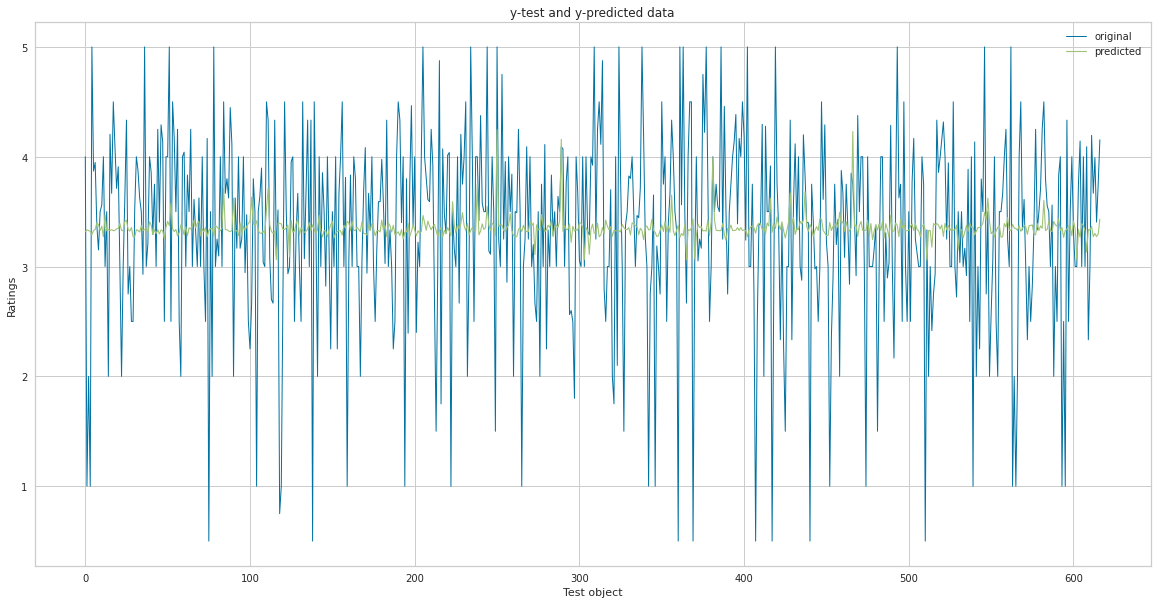

A plot of the y-test and y-predicted for every object of y-test


In [51]:
#The code below is adapted from the following source:
#https://www.datatechnotes.com/2020/10/regression-example-with-decisiontreeregressor.html

x_ax = range(len(y_test))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('Test object')
plt.ylabel('Ratings')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
print("A plot of the y-test and y-predicted for every object of y-test")

The code below is adapted from the following source:

https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

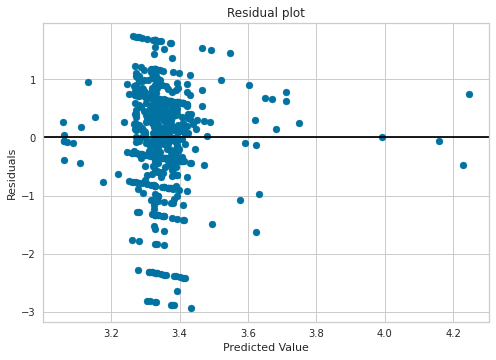

A residual plot of the linear regression model


In [52]:
#The code below was inspired by the following source:
#https://stackoverflow.com/questions/62681388/residual-plot-for-residual-vs-predicted-value-in-python

residuals = np.empty(len(y_test))
for i in range(len(y_test)):
    residuals[i] = y_test.iloc[i]-y_pred[i]
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black')
plt.title('Residual plot')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.show()
print('A residual plot of the linear regression model')           

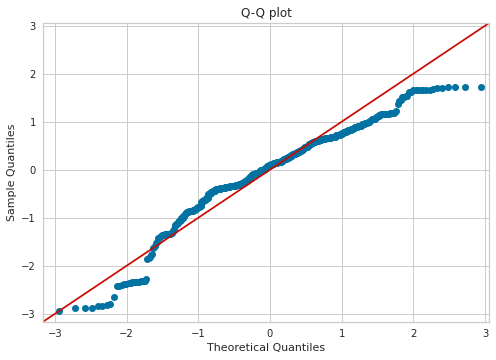

A Q-Q plot of the linear regression model


In [61]:
#The code below is adapted from the following source:
#https://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy

sm.qqplot(residuals, line='45')
pylab.title("Q-Q plot")
pylab.show()
print("A Q-Q plot of the linear regression model")

The code below is adapted from the following source:

https://inria.github.io/scikit-learn-mooc/python_scripts/cross_validation_nested.html

In [62]:
#The code below is adapted from the following source:
#https://inria.github.io/scikit-learn-mooc/python_scripts/cross_validation_nested.html

param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}           # All the values for max_depth with which the model will be tuned.
model_to_tune = DecisionTreeRegressor()

search = GridSearchCV(estimator=model_to_tune, param_grid=param_grid) # Nested cross validation, which finds the best value for the hyper-parameter max_depth
search.fit(X,y) 

print(f"The best parameter found is: {search.best_params_}")

The best parameter found is: {'max_depth': 1}


The code below is adapted from the following source:

https://www.datatechnotes.com/2020/10/regression-example-with-decisiontreeregressor.html

Mean squared error: 0.69
Coefficient of determination: 0.00
Mean squared error-baseline: 0.69
Coefficient of determination-baseline: -0.00


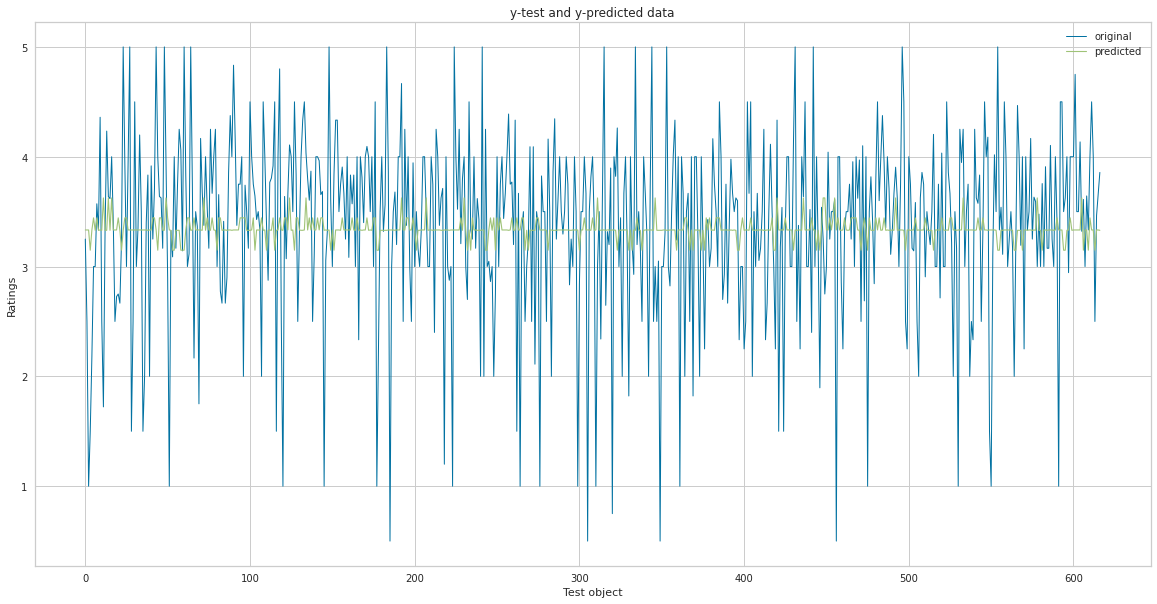

A plot of the y-test and y-predicted for every object of y-test


In [63]:
#The code below is adapted from the following source:
#https://www.datatechnotes.com/2020/10/regression-example-with-decisiontreeregressor.html
    
dtr = DecisionTreeRegressor(max_depth=3) # The model with the best max_depth as found above #adapted from the source 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10) #adapted from the source 
dtr.fit(X_train, y_train) #adapted from the source 

y_pred = dtr.predict(X_test) #adapted from the source 

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

#baseline performance where the mean of y is the output for every test data point
# The mean squared error
print("Mean squared error-baseline: %.2f" % mean_squared_error(y_test, y_pred_baseline))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination-baseline: %.2f" % r2_score(y_test, y_pred_baseline))

#adapted from the source:
x_ax = range(len(y_test))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('Test object')
plt.ylabel('Ratings')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
print("A plot of the y-test and y-predicted for every object of y-test")

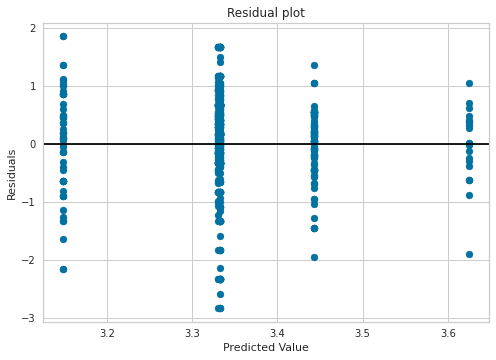

A residual plot of the decision tree regressor model


In [65]:
residuals = np.empty(len(y_test))
for i in range(len(y_test)):
    residuals[i] = y_test.iloc[i]-y_pred[i]
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black')
plt.title('Residual plot')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.show()
print('A residual plot of the decision tree regressor model')

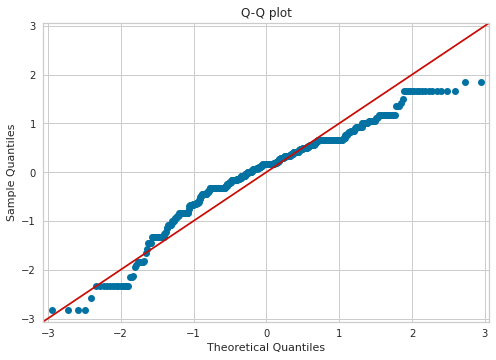

A Q-Q plot of the decision tree regressor model


In [66]:
sm.qqplot(residuals, line='45')
pylab.title("Q-Q plot")
pylab.show()
print("A Q-Q plot of the decision tree regressor model")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52f9a748-eda9-4f41-beab-1c14af369531' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>